# **Causal Inference: A Comprehensive Guide**

**Introduction**

Causal inference is a pivotal process in data science, essential for discerning why things happen beyond mere observation of patterns or correlations. This investigative approach is vital across disciplines, aimed at understanding and quantifying the cause-effect dynamics that drive various outcomes. Such an understanding is critical, as it informs the decisions in a multitude of fields such as medicine, public policy, and business. These decisions often hinge on the causal impact of interventions, making causal inference not just a statistical endeavor, but a fundamental aspect of informed decision-making. The Harvard Data Science Review has initiated a new column, "Catalytic Causal Conversations," which underscores the interdisciplinary relevance of causal inference by offering accessible overviews of methodological developments and their implications across domains like healthcare, education, and environmental policy​ (MIT Press HD&S)​.


**Why It Is Important**

Grasping causal relationships is the linchpin in transforming data into actionable knowledge. Whether it’s evaluating the effectiveness of a medical treatment or gauging the impact of economic policies, causal inference provides the robust framework needed for such assessments. It is what allows policymakers to decipher which policies yield positive social outcomes or helps marketers isolate campaigns that truly drive sales. The cross-disciplinary nature of causal inference signifies its universal importance, as it equips professionals with tools and a common language to approach problems where understanding causation from data is pivotal​ (MIT Press HD&S)​​ (Oxford Academic)​.

**Benefits of Causal Inference**

The benefits of causal inference are wide-ranging and profound. It offers the clarity needed for understanding complex mechanisms, whether in natural phenomena, human behavior, or technological systems. By distinguishing causation from correlation, it provides a more reliable basis for making decisions and policies that can shape positive outcomes in society. Furthermore, causal inference is integral to advancing scientific knowledge, offering a methodological approach that can handle diverse data and unravel complex relationships. This benefit is echoed across various scientific domains, where causal inference is applied to understand the intricate dynamics that define our natural and social worlds​ (MIT Press HD&S)​​ (Oxford Academic)​.

**Dos and Don'ts**

Approaching causal inference requires both rigor and caution. One should select variables thoughtfully, engage with experts, and base conclusions on robust evidence, particularly when experimental data is unavailable. Randomized trials are the gold standard but not always feasible; in such cases, drawing on methods like synthetic controls can help. Synthetic controls create a counterfactual to understand what would have happened without the intervention, which is pivotal for policymaking and understanding the impact of real-world events​ (Simons Institute)​. However, researchers must avoid conflating correlation with causation and remain vigilant against bias introduced by confounders. Visual tools like directed acyclic graphs (DAGs) can illustrate complex causal relationships, aiding both understanding and communication of causal findings​ (Simons Institute)​.

Do carefully select variables that might affect your analysis.

Don't confuse correlation with causation.

Do use randomized controlled trials where possible.

Don't ignore potential confounders.

Do utilize robust statistical methods for inference.

**Uses in Machine Learning**

In machine learning, causal inference empowers feature selection, helping identify which variables could cause outcomes of interest, leading to more effective models. It's integral to models that generalize well to new settings, particularly in environments where data distributions are subject to change. Moreover, it aligns with the goals of explainable AI, where understanding the cause of a model's predictions is as crucial as the predictions themselves. The methodologies in causal inference, such as DAGs, have been utilized in machine learning to determine which features have causal relationships and how these relationships can be leveraged in predictive models. The rise of causal machine learning, which focuses on the application of causal inference in machine learning tasks, is a testament to the merging of these two fields. It reflects a broader trend towards more sophisticated, robust, and interpretable AI systems that can adapt to various interventions and changes in the environment, making them more reliable and useful for real-world applications​ (MIT Press HD&S)​.

**Feature Selection:** Identifying causal relationships helps in selecting features that are not just correlated but also causative.

**Improving Model Generalization:** Causal models can better generalize to unseen data by understanding the underlying data generation process.

**Explainable AI:** Enhancing the interpretability of machine learning models by elucidating causal relationships.

# **Understanding Causality**

Causality is a fundamental concept that seeks to determine the relationships between events, particularly to discern whether one event is the result of another. In data science and statistics, establishing causality means determining whether a change in one variable causes a change in another variable.

**1.Creating a Dataset**

In [82]:
import pandas as pd
import numpy as np

# Simulate some data
np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# Add a causal relationship: B = A * 3 + noise
df['B'] = df['A'] * 3 + np.random.normal(0, 0.1, size=len(df))


**2. Visualizing the Data**
Before diving into statistical methods, a scatter plot can provide a visual hint of causality.

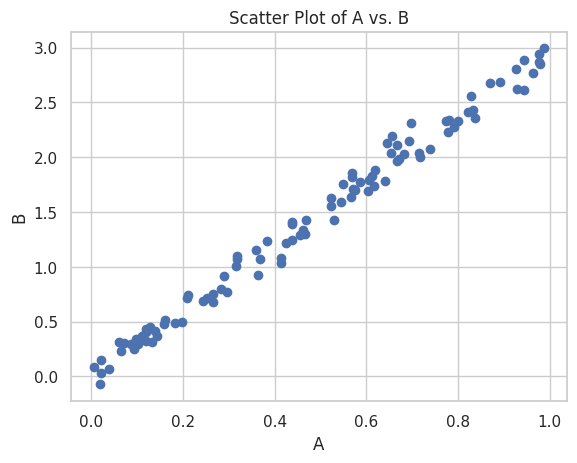

In [83]:
import matplotlib.pyplot as plt

plt.scatter(df['A'], df['B'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('Scatter Plot of A vs. B')
plt.show()


**3: Correlation**
Correlation is often the first step to test if there's a linear relationship, which is necessary but not sufficient for causation.

In [84]:
correlation = df.corr()
print(correlation)


          A         B
A  1.000000  0.994252
B  0.994252  1.000000


**4: Establishing Causality**
To establish causality, one could use regression analysis. Here we use linear regression to see if changes in A predict changes in B.

In [85]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
model = LinearRegression()
model.fit(df[['A']], df['B'])

# Coefficients
print(f"Coefficient of A predicting B is {model.coef_[0]}")


Coefficient of A predicting B is 2.9464778007771475


**5: Another example for Causal Inference**

For demonstration purposes, let's simulate some data where A (advertising spending) does indeed have a causal effect on B (sales).

In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Setting a random seed for reproducibility
np.random.seed(42)

# Simulating advertising spending ('A') data
A = np.random.normal(100, 20, 100)

# Simulating sales ('B') as being influenced by advertising spending plus some noise
B = 50 + 0.75 * A + np.random.normal(0, 10, 100)

# Creating a DataFrame
df = pd.DataFrame({'Advertising': A, 'Sales': B})


**Visualizing the Relationship**

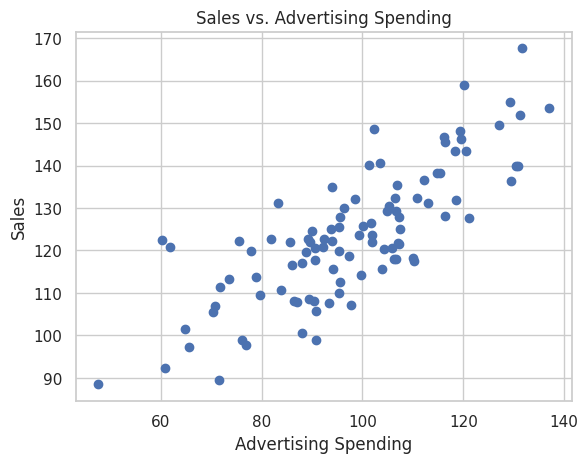

In [88]:
plt.scatter(df['Advertising'], df['Sales'])
plt.title('Sales vs. Advertising Spending')
plt.xlabel('Advertising Spending')
plt.ylabel('Sales')
plt.show()


**Applying Linear Regression to Infer Causality**

In [89]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(df[['Advertising']], df['Sales'])

# Print out the coefficient of 'Advertising'
print(f"Coefficient of Advertising predicting Sales is {model.coef_[0]:.2f}")

# Predicting 'Sales' using the model
df['Predicted Sales'] = model.predict(df[['Advertising']])


Coefficient of Advertising predicting Sales is 0.68


** Interpreting the Results**

**Interpretation:**


**Positive Relationship:** The positive coefficient highlights a direct relationship between advertising spending and sales. This could be interpreted as evidence that investing in advertising has a beneficial impact on sales.


**Magnitude of Effect:** The magnitude of the coefficient (0.68) tells us the size of the effect that advertising spending has on sales. In this simplified example, if advertising spending increased by 100 units, sales would be expected to increase by 68 units, based on this model.


**Decision Making:** This insight can be crucial for decision-making within a company. Understanding that advertising spending has a positive impact on sales can justify the allocation of more budget towards advertising efforts.


**Causal Inference Caution:** While the linear regression model provides this coefficient, caution must be exercised before inferring causality. This result indicates a correlation; however, asserting causation requires a deeper analysis, potentially including experiments designed to rule out confounding factors and to establish a cause-and-effect relationship.

**Next Steps:**
Further Analysis: To bolster the claim of causality, one could explore additional statistical methods such as instrumental variable regression or randomized controlled trials, where feasible.

**Consider Confounders: **It's important to consider potential confounding variables that might influence both advertising spending and sales (e.g., market demand, seasonality, competition) in the analysis.


**Expand Model:** Expanding the model to include other variables that could affect sales will provide a more holistic view of the factors influencing sales performance.


In summary, the coefficient from the linear regression provides valuable insights into the relationship between advertising spending and sales, serving as a foundation for more detailed analysis and decision-making. However, it's crucial to approach causal claims with caution and consider a broader analysis to establish a more definitive cause-and-effect relationship.

# **Now lets dive into this with some real dataset and try to infere**

**About the data:**

Water quality is one of the most important factors in a healthy ecosystem. Clean water supports a diversity of plants and wildlife. Though it may seem unrelated at first, our actions on land affect the quality of our water. Pollutants, excessive nutrients from fertilizers, and sediment frequently get carried into local lakes and rivers via runoff from urban areas or agricultural fields.

Scientists measure a variety of properties to determine water quality. These include temperature, acidity (pH), dissolved solids (specific conductance), particulate matter (turbidity), dissolved oxygen, hardness, and suspended sediment. Each reveals something different about the health of a water body.

The following water properties are important in determining water quality:

**Temperature:** Water temperature is important to fish and aquatic plants. Temperature can affect the level of oxygen, as well as the ability of organisms to resist certain pollutants.

**Acidity – pH:** The measurement of pH is a measure of the amount of hydrogen ions (H+) present in a substance such as water. Knowing the amount of hydrogen in a substance allows us to judge whether it is acidic, neutral, or basic.

**Dissolved Oxygen:** A small amount of oxygen, about ten molecules of oxygen per million molecules of water, is dissolved in water. Fish and microscopic organisms need dissolved oxygen to survive.

**Turbidity:** Turbidity makes the water cloudy or opaque. Turbidity is the amount of particulate matter (such as clay, silt, plankton, or microscopic organisms) suspended in water.

**Specific Conductance:** Specific conductance measures the capacity of water to conduct an electrical current. It depends on the number of dissolved solids, such as salt, in the water.

**Biochemical Oxygen Demand (BOD)** is a measure of the amount of oxygen required to remove waste organic matter from water in the process of decomposition by aerobic bacteria (those bacteria that live only in an environment containing oxygen). Higher BOD indicates more oxygen is required, which is less for oxygen-demanding species to feed on, and signifies lower water quality. Inversely, low BOD means less oxygen is being removed from water, so water is generally purer.

**Nitrite and Nitrate** - Nitrate and nitrite are soluble compounds containing nitrogen and oxygen. In the environment, nitrite (NO2 - ) generally converts to nitrate (NO3 - ), which means nitrite occurs very rarely in groundwater. Nitrate is essential for plant growth and is present in all vegetables and grains. For this reason, the predominant use of nitrate in industry is for fertilizer. Nitrite is used for curing meats, manufacturing explosives, and for maintenance of industrial boilers. According to the World Health Organization, the average American male consumes 9-22 milligrams of nitrate-N per day primarily from leafy greens and root vegetables like carrots, beets, and radishes. Average nitrite-N consumption is much lower at 0.1-0.8 mg per day, primarily from cured meats. Intake at these levels is not considered a health risk.

**Fecal coliform** - A fecal coliform is a facultatively anaerobic, rod-shaped, gram-negative, non-sporulating bacterium. Coliform bacteria generally originate in the intestines of warm-blooded animals. In general, increased levels of fecal coliforms provide a warning of failure in water treatment, a break in the integrity of the distribution system, and possible contamination with pathogens. When levels are high there may be an elevated risk of waterborne gastroenteritis. Tests for the bacteria are cheap, reliable, and rapid (1-day incubation).

For context, coliform must be below 104 MPN/100 mL, preferably absent from water for it to be considered safe for general human use, and for irrigation where coliform may cause disease outbreaks from contaminated-water in agriculture.

# **Dataset Preparation and Cleaning**

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Water_pond_tanks_2021.csv', encoding='cp1252')




In [12]:
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7.0,8.0,245,5160,1.6,3.2,1.02,3.60,9,21,120,210
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3.0,6.8,6.9,7.8,599,1179,1.9,4.6,0.77,3.56,15,23,150,240
2,1790.0,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,18.0,24.0,4.2,6.0,7.2,8.2,28000,56900,2.4,2.8,1.20,1.64,3,3,47,150
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180,476,1.0,2.5,0.34,2.30,24,365,170,549
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496,734,1.0,2.3,0.35,1.00,43,289,240,727


In [13]:
# It appears some numeric data are stored as objects. Let's convert them to numeric, handling errors.
numeric_columns = ['Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)', 'pH (Min)',
                   'Conductivity (?mhos/cm) (Min)', 'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Min)',
                   'BOD (mg/L) (Max)', 'Nitrate N + Nitrite N(mg/L) (Min)', 'Nitrate N + Nitrite N(mg/L) (Max)',
                   'Fecal Coliform (MPN/100ml) (Min)', 'Fecal Coliform (MPN/100ml) (Max)',
                   'Total Coliform (MPN/100ml) (Min)', 'Total Coliform (MPN/100ml) (Max)']


In [14]:
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [15]:
# Check for missing values and decide on an imputation strategy or removal
df.isnull().sum()

# Simple Imputation Example: Filling missing values with the median of each column
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [16]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    float64
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    float64
 8   pH (Min)                           620 non-null    float64
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      620 non-null    float64
 11  Conductivity (?mhos/cm) (Max)      620 non-null    float64

Change the data type of the Total Coliform (MPN/100ml) (Max) column to float. This conversion is necessary if the column was not initially in a numeric format, which could hinder numerical operations and analyses.

In [17]:
df['Total Coliform (MPN/100ml) (Max)']=df['Total Coliform (MPN/100ml) (Max)'].astype(float)

In [18]:
df=df.replace('-', np.nan)

In [19]:
df=df.replace('\n4', '',regex=True)

In [20]:
df.iloc[:,4:19]=df.iloc[:,4:19].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    float64
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    float64
 8   pH (Min)                           620 non-null    float64
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      620 non-null    float64
 11  Conductivity (?mhos/cm) (Max)      620 non-null    float64

In [22]:
df.columns

Index(['STN\nCode', 'Name of Monitoring Location', 'Type Water Body',
       'State Name', 'Temperature\n?C (Min)', 'Temperature\n?C (Max)',
       'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
       'pH (Min)', 'pH (Max)', 'Conductivity (?mhos/cm) (Min)',
       'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
       'Nitrate N + Nitrite N(mg/L) (Min)',
       'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
       'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
       'Total Coliform (MPN/100ml) (Max)'],
      dtype='object')

# **Exploratory Data Analysis**

Conduct EDA to understand the distributions, relationships, and potential anomalies in the dataset.

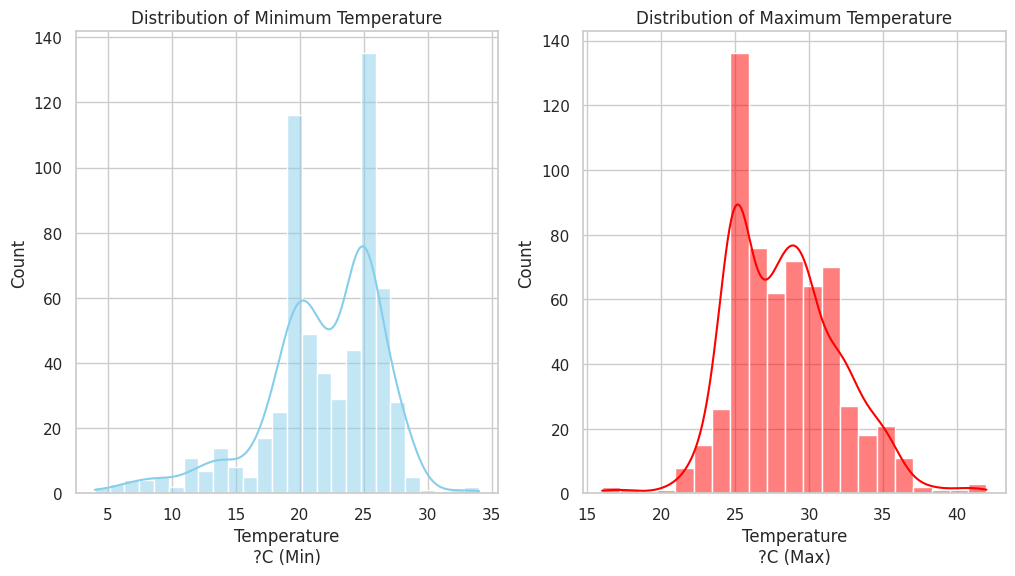

In [25]:
sns.set(style="whitegrid")

# Temperature Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Temperature\n?C (Min)'], kde=True, color='skyblue')
plt.title('Distribution of Minimum Temperature')
plt.subplot(1, 2, 2)
sns.histplot(df['Temperature\n?C (Max)'], kde=True, color='red')
plt.title('Distribution of Maximum Temperature')
plt.show()

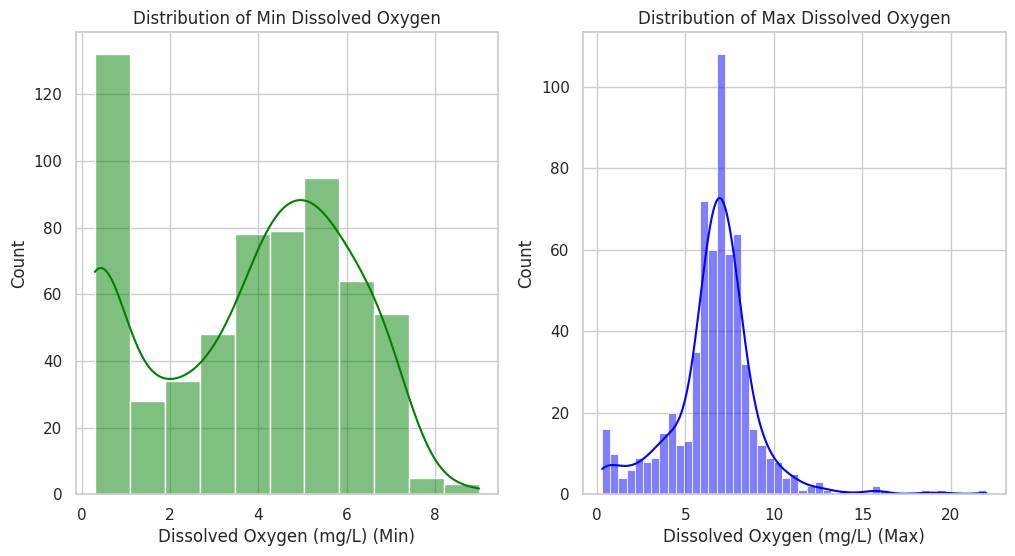

In [26]:
# Dissolved Oxygen Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Dissolved Oxygen (mg/L) (Min)'], kde=True, color='green')
plt.title('Distribution of Min Dissolved Oxygen')
plt.subplot(1, 2, 2)
sns.histplot(df['Dissolved Oxygen (mg/L) (Max)'], kde=True, color='blue')
plt.title('Distribution of Max Dissolved Oxygen')
plt.show()

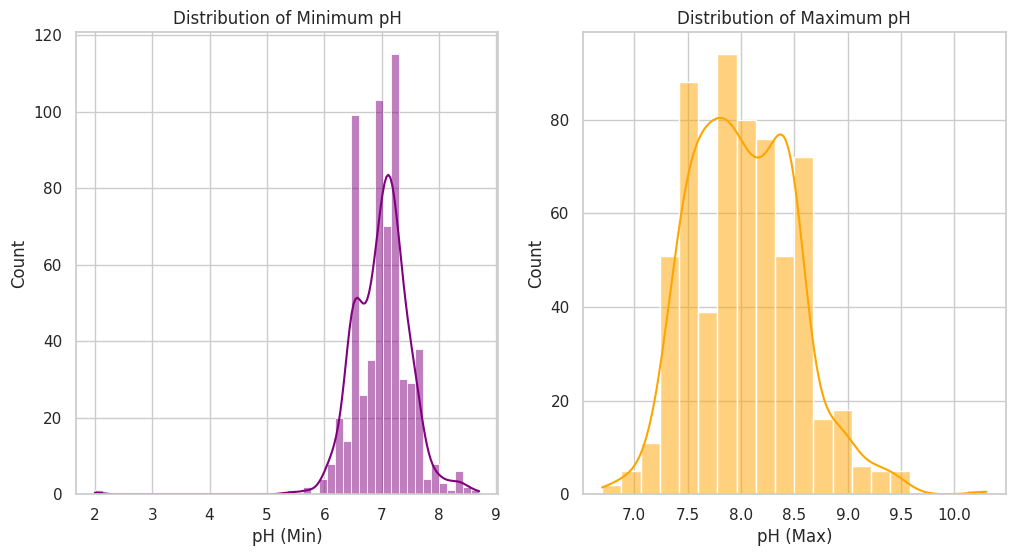

In [27]:
# pH Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['pH (Min)'], kde=True, color='purple')
plt.title('Distribution of Minimum pH')
plt.subplot(1, 2, 2)
sns.histplot(df['pH (Max)'], kde=True, color='orange')
plt.title('Distribution of Maximum pH')
plt.show()

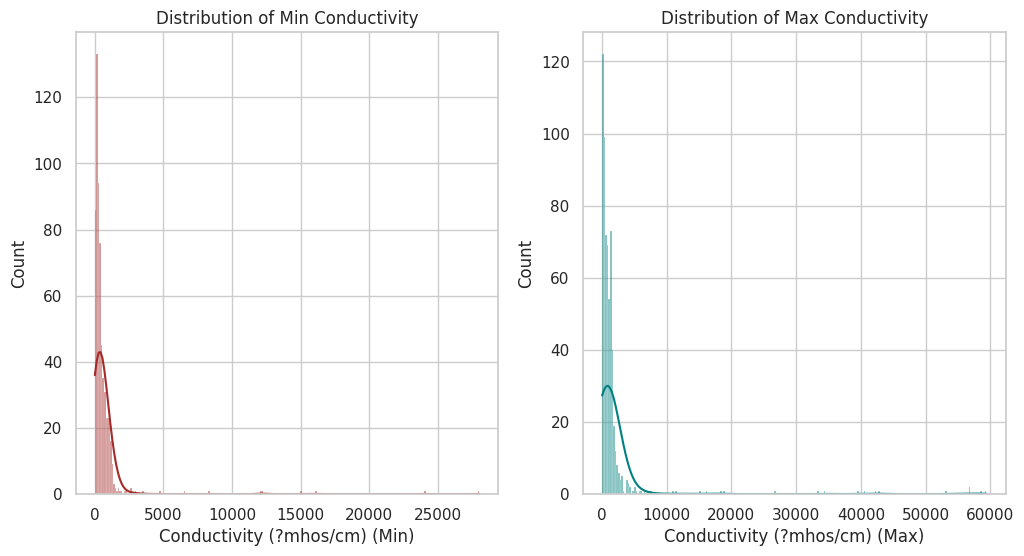

In [28]:
# Conductivity Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Conductivity (?mhos/cm) (Min)'], kde=True, color='brown')
plt.title('Distribution of Min Conductivity')
plt.subplot(1, 2, 2)
sns.histplot(df['Conductivity (?mhos/cm) (Max)'], kde=True, color='teal')
plt.title('Distribution of Max Conductivity')
plt.show()

# **Box Plots to Compare Water Quality Parameters Across Different Water Body Types**

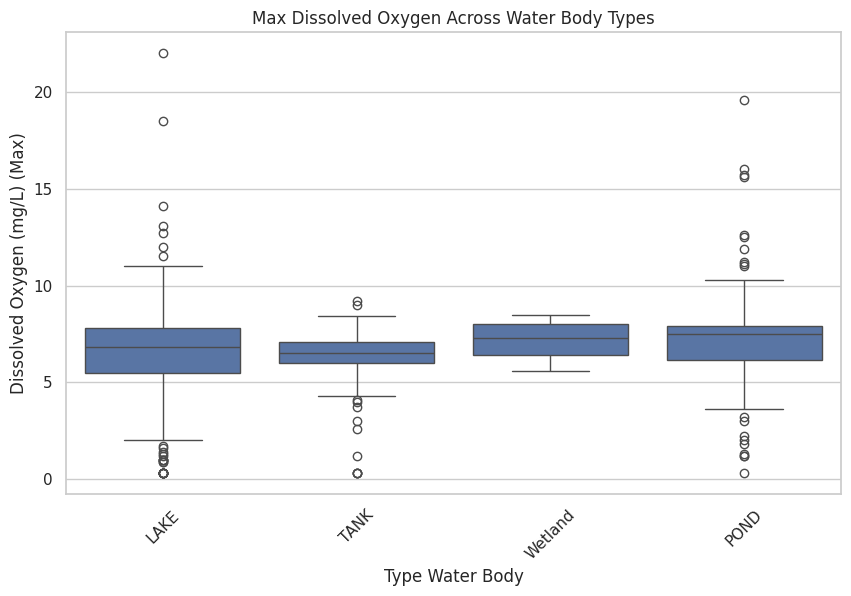

In [29]:
# Comparing Dissolved Oxygen across different water body types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type Water Body', y='Dissolved Oxygen (mg/L) (Max)', data=df)
plt.title('Max Dissolved Oxygen Across Water Body Types')
plt.xticks(rotation=45)
plt.show()

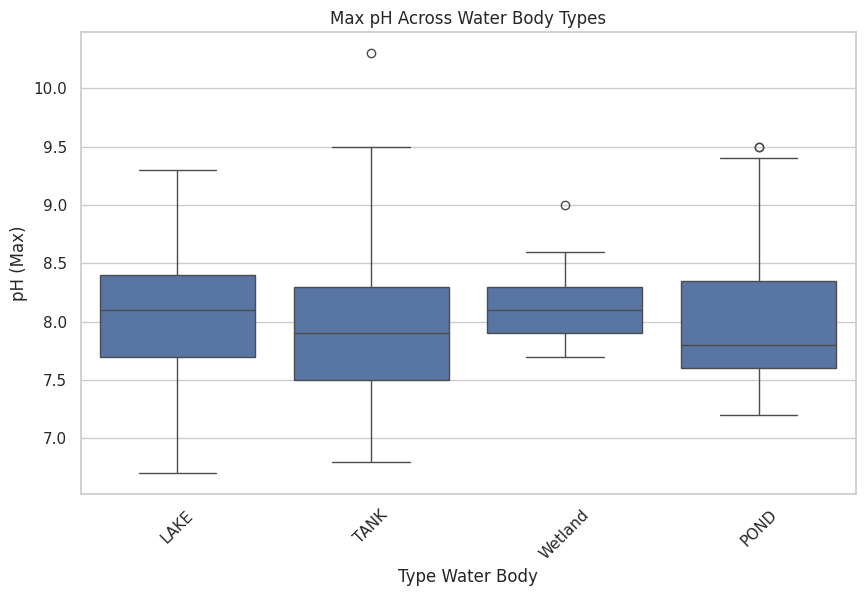

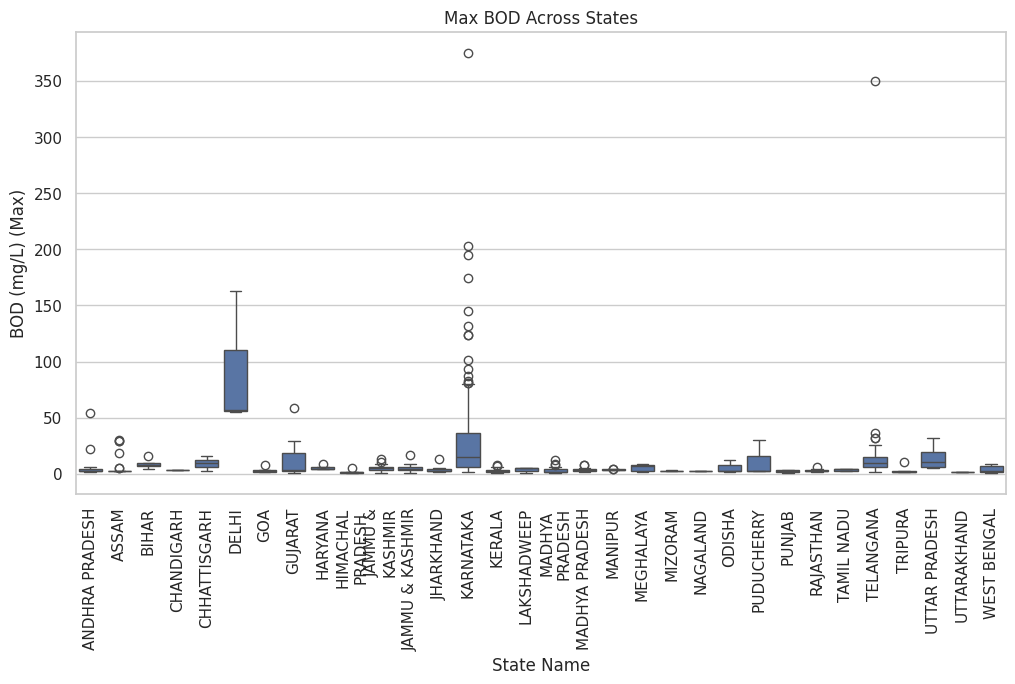

In [30]:
# Comparing pH across different water body types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type Water Body', y='pH (Max)', data=df)
plt.title('Max pH Across Water Body Types')
plt.xticks(rotation=45)
plt.show()

# Comparing BOD across different states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State Name', y='BOD (mg/L) (Max)', data=df)
plt.title('Max BOD Across States')
plt.xticks(rotation=90)
plt.show()

# **Scatter Plots to Examine Relationships Between Parameters**

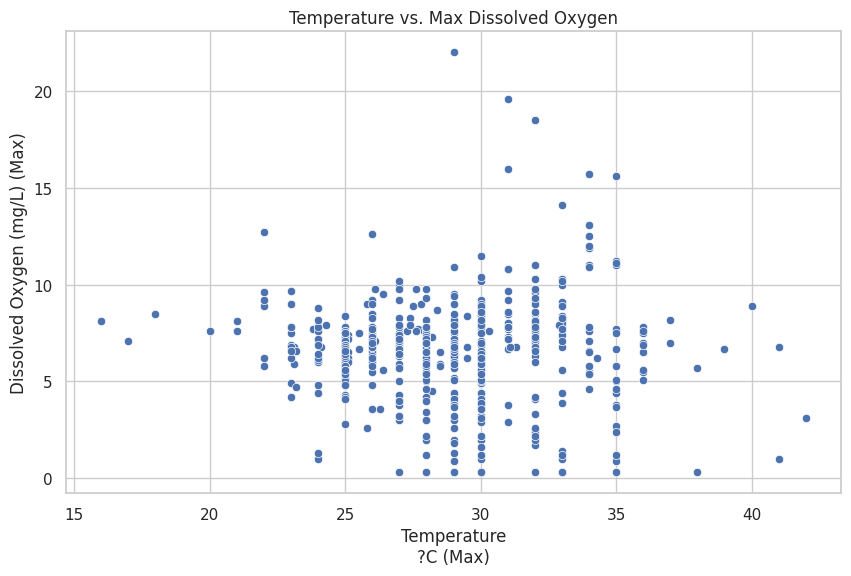

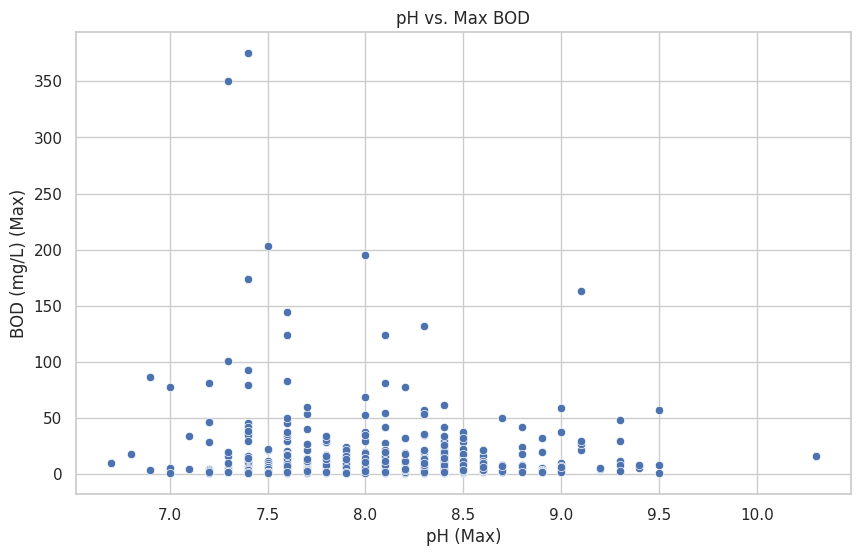

In [33]:
# Relationship between Temperature and Dissolved Oxygen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature\n?C (Max)', y='Dissolved Oxygen (mg/L) (Max)', data=df)
plt.title('Temperature vs. Max Dissolved Oxygen')
plt.show()

# Relationship between pH and BOD
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH (Max)', y='BOD (mg/L) (Max)', data=df)
plt.title('pH vs. Max BOD')
plt.show()

# **Correlation Matrix**

In [35]:
# Calculate the correlation matrix
corr = df.corr()
corr

<ipython-input-35-bdb0e200d80d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,STN\nCode,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
STN\nCode,1.000000,0.213505,-0.053697,-0.412493,-0.326721,-0.136582,-0.031387,0.019531,0.040555,0.092498,0.144306,0.134918,0.287738,0.039697,0.039157,-0.011755,0.021349
Temperature\n?C (Min),0.213505,1.000000,0.200801,-0.321097,-0.262463,-0.134892,0.079703,0.090278,0.081136,0.230068,0.204987,0.076836,0.091076,0.181939,0.049225,0.094035,0.044437
Temperature\n?C (Max),-0.053697,0.200801,1.000000,-0.063258,-0.008252,0.107145,0.227659,-0.019488,0.066468,0.033891,-0.145746,-0.020655,0.018511,-0.159647,-0.060620,0.032259,-0.057884
Dissolved Oxygen (mg/L) (Min),-0.412493,-0.321097,-0.063258,1.000000,0.546468,0.151507,-0.073585,-0.058752,-0.037151,-0.371432,-0.420081,-0.208947,-0.280864,-0.158125,-0.108016,-0.067474,-0.094802
Dissolved Oxygen (mg/L) (Max),-0.326721,-0.262463,-0.008252,0.546468,1.000000,0.073788,0.119009,-0.114765,0.010966,-0.224478,-0.139755,-0.327557,-0.233882,-0.018115,-0.058619,-0.080091,-0.070426
pH (Min),-0.136582,-0.134892,0.107145,0.151507,0.073788,1.000000,0.495585,0.037446,-0.013445,0.116634,-0.165764,-0.020525,-0.033694,-0.103878,-0.086902,0.040722,-0.072640
pH (Max),-0.031387,0.079703,0.227659,-0.073585,0.119009,0.495585,1.000000,0.039925,0.089751,0.035543,-0.074960,-0.104296,0.035192,-0.013829,-0.092993,0.002786,-0.111075
Conductivity (?mhos/cm) (Min),0.019531,0.090278,-0.019488,-0.058752,-0.114765,0.037446,0.039925,1.000000,0.584072,0.112355,0.051667,0.121743,0.041113,0.059951,0.009423,0.123736,0.008814
Conductivity (?mhos/cm) (Max),0.040555,0.081136,0.066468,-0.037151,0.010966,-0.013445,0.089751,0.584072,1.000000,0.008665,0.044471,0.050135,0.006530,-0.007565,-0.005323,0.027291,-0.006079
BOD (mg/L) (Min),0.092498,0.230068,0.033891,-0.371432,-0.224478,0.116634,0.035543,0.112355,0.008665,1.000000,0.471992,0.285027,0.108716,0.342969,0.119278,0.369524,0.161720


In [36]:
import matplotlib.pyplot as plt

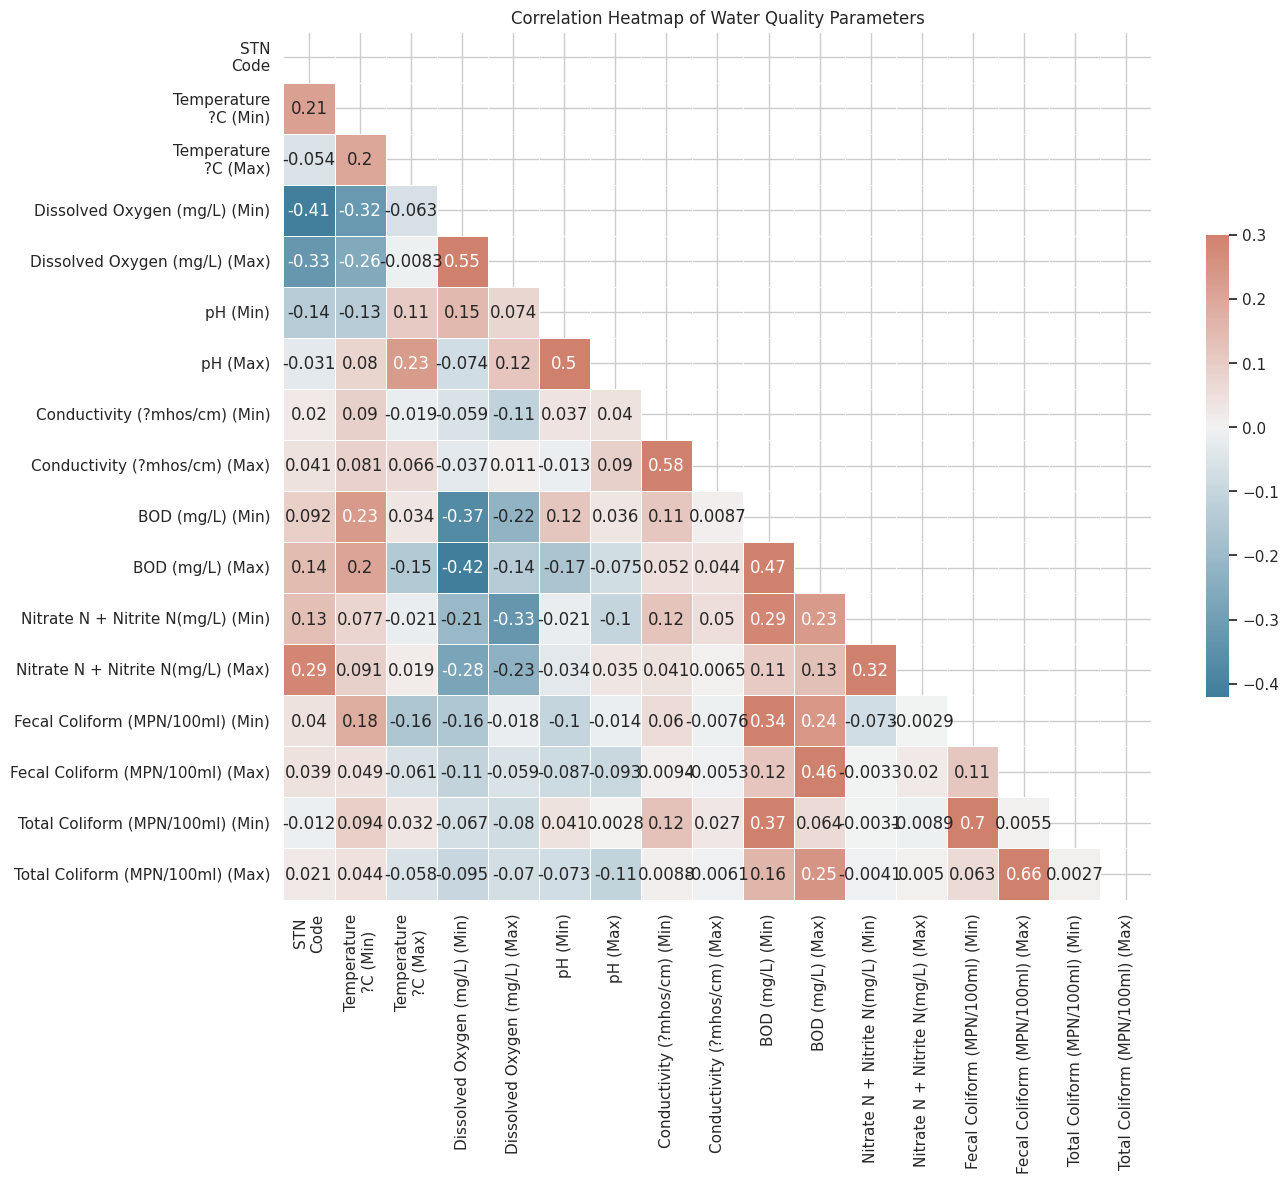

In [37]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()

**Temperature and Dissolved Oxygen:** There is a moderately negative correlation between maximum temperature and minimum dissolved oxygen levels, which is typical as warmer water holds less oxygen.

Water temperature is one of the most important factors affecting water systems. Temperature can affect dissolved oxygen levels, chemical and biological processes, species compositions, water density and stratification, and life-stages in different marine organisms.

For optimal health in aquatic organisms, the temperature must be within their optimal range. Anything outside this range can have detrimental effects on aquatic life; increasing stress levels and often causing death. The reproductive stage (spawning & embryo development) in fish is the most temperature-sensitive period. Temperature also affects ammonia levels in the water, the rate of photosynthesis, metabolic rates in aquatic organisms, and how sensitive aquatic organisms are to pollution.

Due to changes in external environmental conditions, water temperatures fluctuate throughout the day, and between seasons. The temperature in freshwater systems is heated by the sun, and although other water inputs such as precipitation, groundwater, and surface runoff can affect water temperatures, heat is either lost or gained via condensation and evaporation.

The temperature of water affects the amount of dissolved oxygen (DO) water can hold. As water temperatures increase, the amount of DO in water decreases. DO is the amount of oxygen dissolved in water, which can also fluctuate both daily and seasonally.

DO comes from both the atmosphere and photosynthesis from aquatic plants, which is depleted via chemical oxidation and respiration from aquatic organisms (including microorganisms), mostly through decomposition of organic material and plant biomass. The solubility of oxygen in water has an optimal pressure of 1 atm (atmospheric pressure) that ranges from ~15 mg/L at 0ºC to 8 mg/L at 30ºC.

**pH and Conductivity:** There is a strong positive correlation between the maximum pH and maximum conductivity. This could indicate that higher pH levels are associated with higher mineral content in the water, which increases conductivity.

**BOD (Biological Oxygen Demand):** The minimum and maximum BOD levels show a moderate positive correlation with each other. Higher BOD can suggest more organic matter present in the water.

**Nitrate + Nitrite:** The maximum levels of nitrate and nitrite show positive correlations with BOD, which could indicate that areas with higher organic decay also have higher nutrient runoff.

**Coliform Bacteria:** Fecal and total coliform levels (both minimum and maximum) show strong positive correlations with each other. High coliform counts can indicate contamination and potential health risks.

**Coliform and Nitrate + Nitrite:** There’s also a notable positive correlation between maximum coliform levels and maximum nitrate + nitrite levels, potentially pointing towards common sources of pollution such as agricultural runoff.

**Diagonal Elements:** The diagonal, which is all red, represents the perfect positive correlation of each variable with itself.

**Plot between Temperature and Dissolved Oxygen**

It seems to be difficult to find "strong correlation" among features, except min and max of same features.

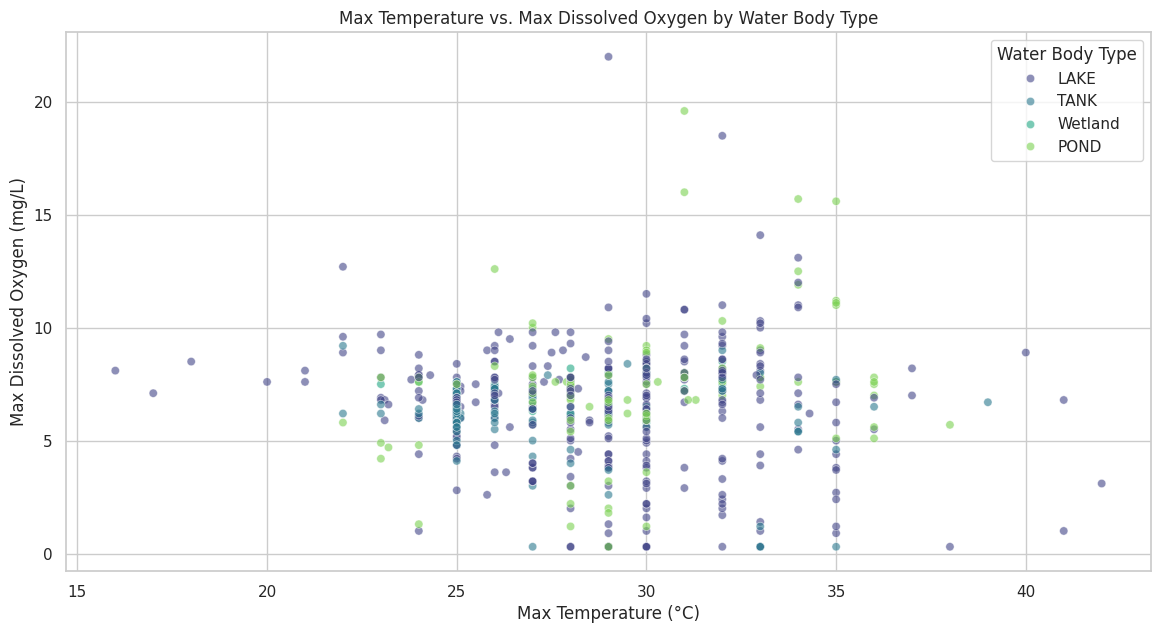

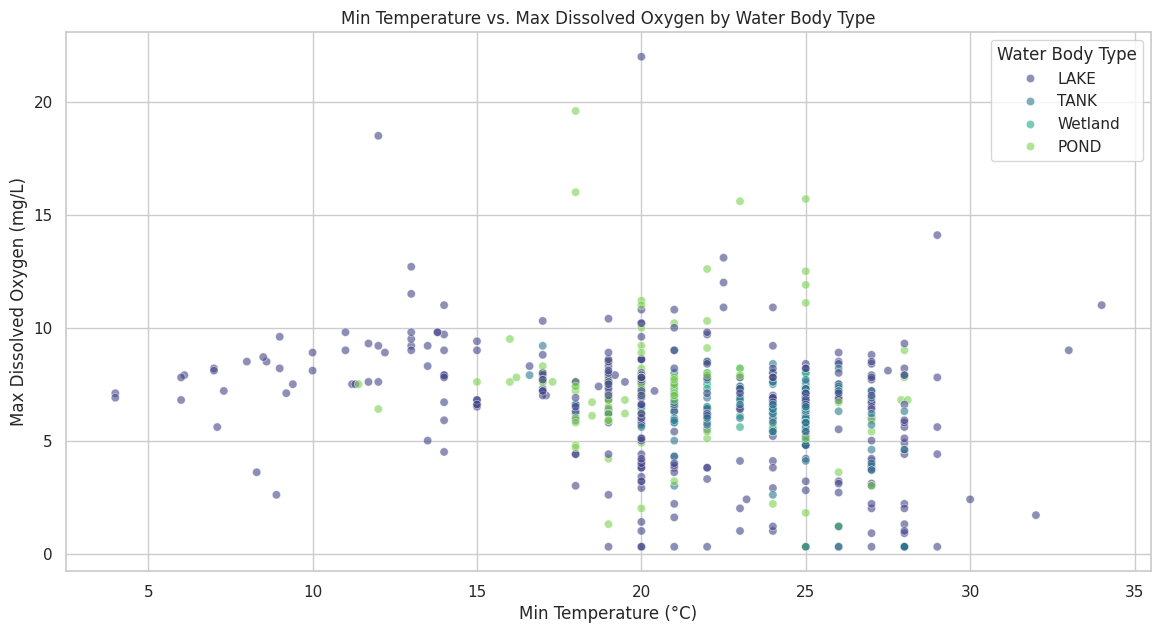

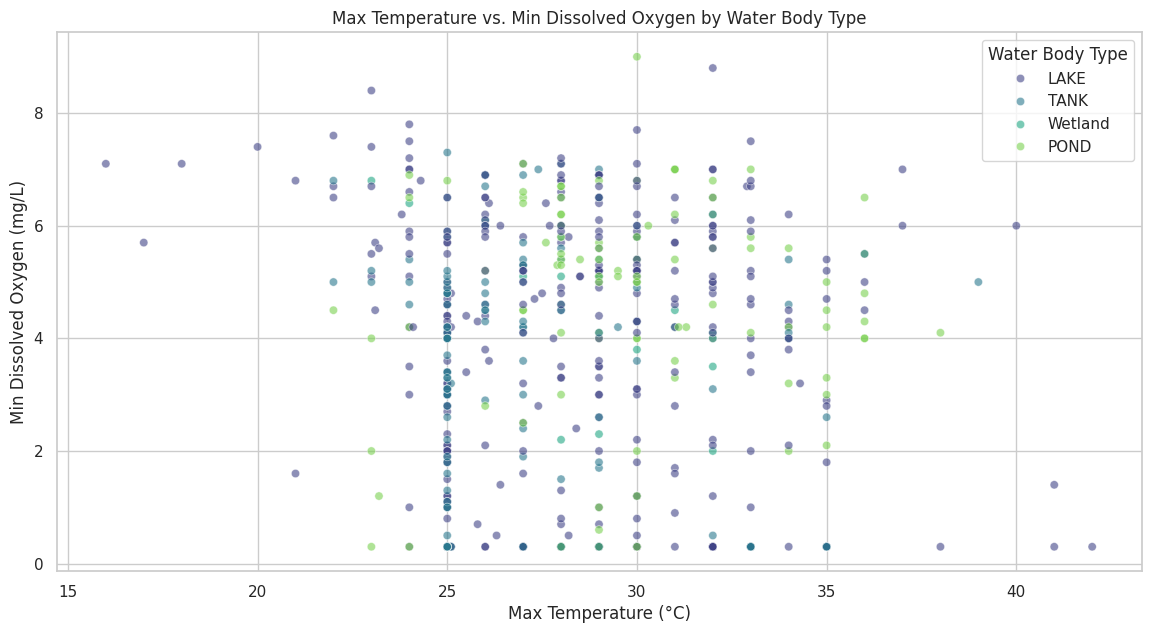

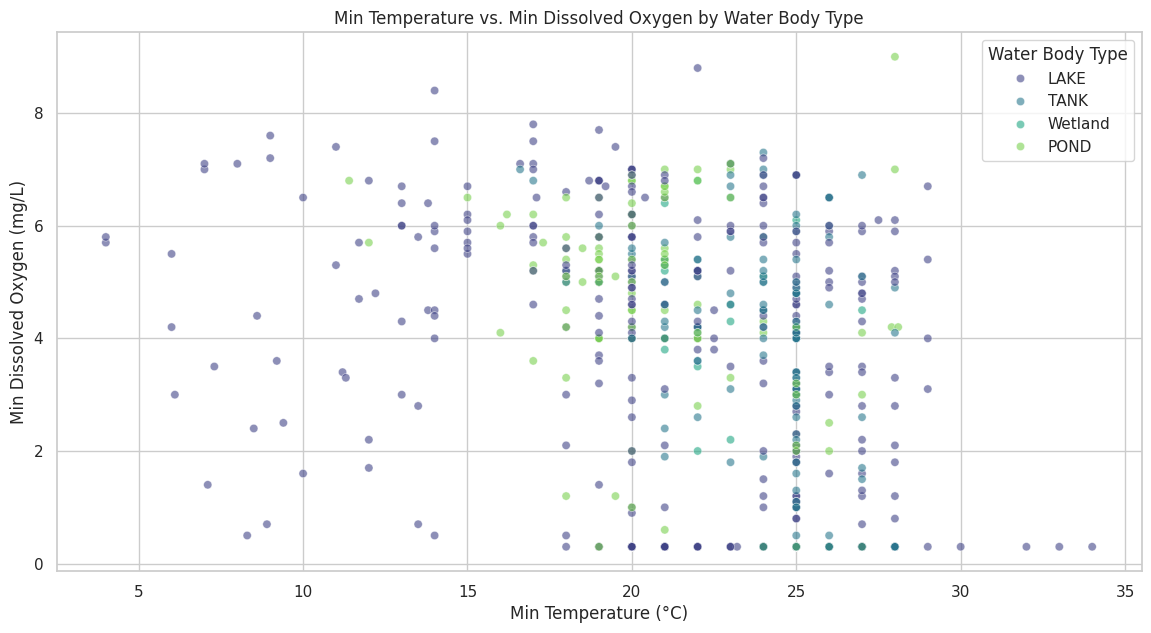

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set(style='whitegrid')

# Scatter plot for Max Temperature vs. Max Dissolved Oxygen, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature\n?C (Max)', y='Dissolved Oxygen (mg/L) (Max)', hue="Type Water Body", data=df, palette='viridis', alpha=0.6)
plt.title('Max Temperature vs. Max Dissolved Oxygen by Water Body Type')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Max Dissolved Oxygen (mg/L)')
plt.legend(title='Water Body Type')
plt.show()

# Scatter plot for Min Temperature vs. Max Dissolved Oxygen, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature\n?C (Min)', y='Dissolved Oxygen (mg/L) (Max)', hue="Type Water Body", data=df, palette='viridis', alpha=0.6)
plt.title('Min Temperature vs. Max Dissolved Oxygen by Water Body Type')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Max Dissolved Oxygen (mg/L)')
plt.legend(title='Water Body Type')
plt.show()

# Scatter plot for Max Temperature vs. Min Dissolved Oxygen, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature\n?C (Max)', y='Dissolved Oxygen (mg/L) (Min)', hue="Type Water Body", data=df, palette='viridis', alpha=0.6)
plt.title('Max Temperature vs. Min Dissolved Oxygen by Water Body Type')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Min Dissolved Oxygen (mg/L)')
plt.legend(title='Water Body Type')
plt.show()

# Scatter plot for Min Temperature vs. Min Dissolved Oxygen, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature\n?C (Min)', y='Dissolved Oxygen (mg/L) (Min)', hue="Type Water Body", data=df, palette='viridis', alpha=0.6)
plt.title('Min Temperature vs. Min Dissolved Oxygen by Water Body Type')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Min Dissolved Oxygen (mg/L)')
plt.legend(title='Water Body Type')
plt.show()


**Plot between conductivity and pH by type water body.**

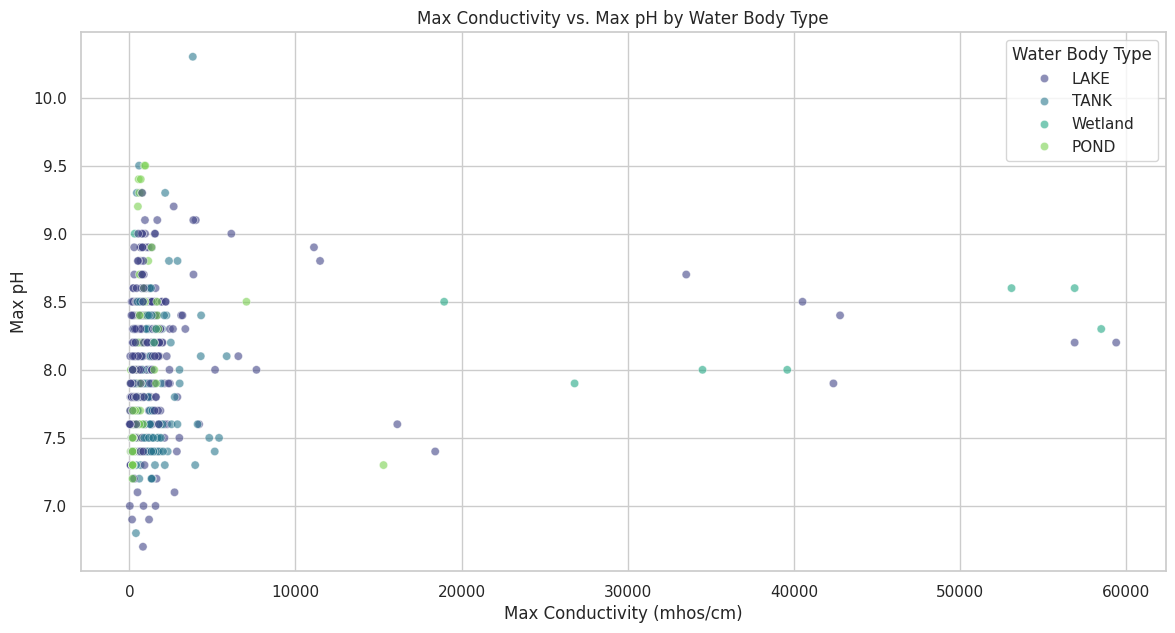

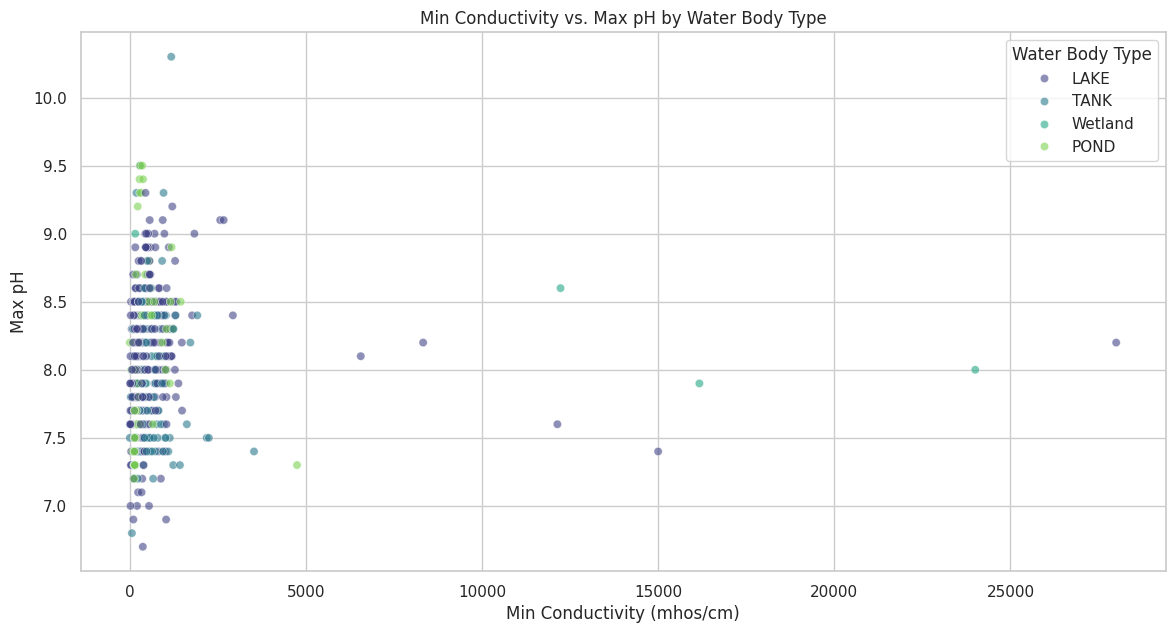

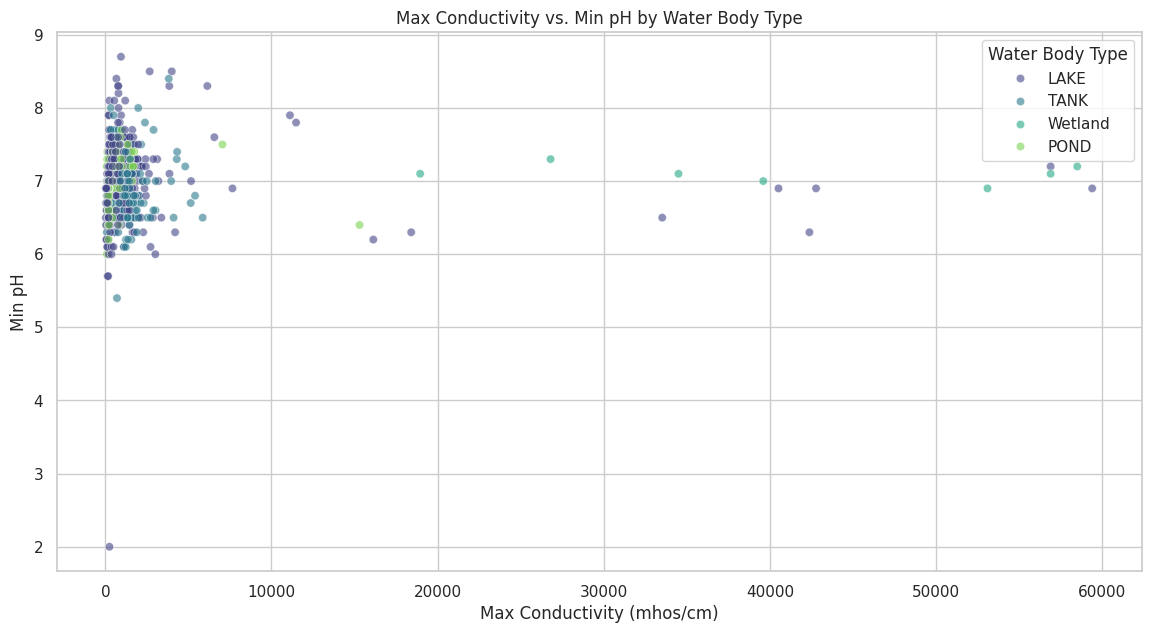

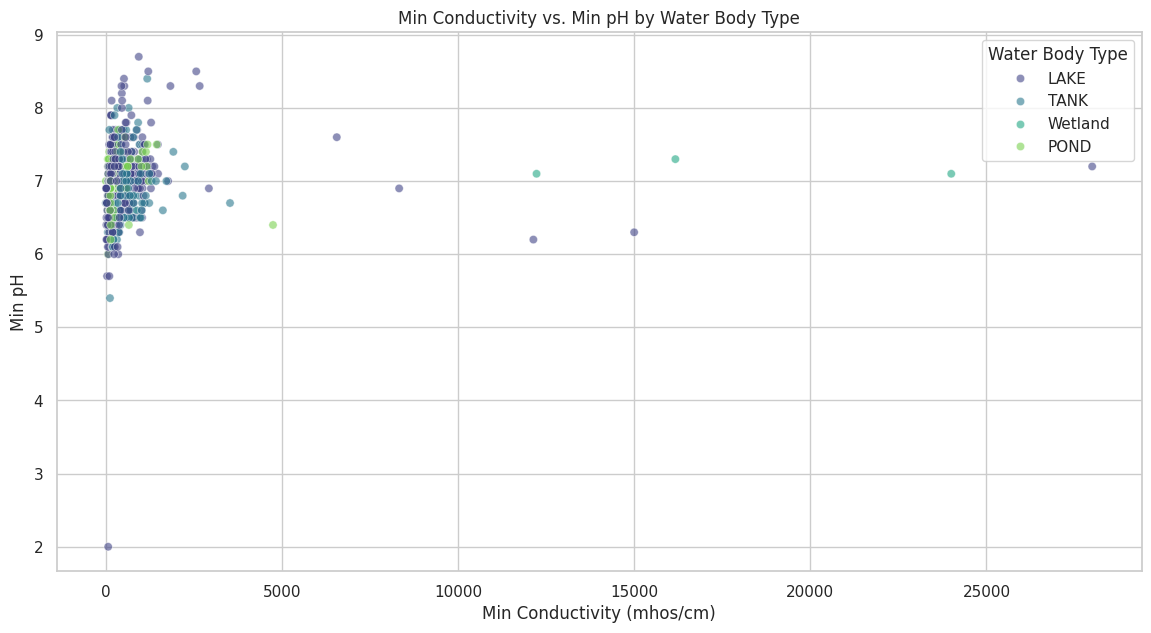

In [39]:
# Scatter plot for Max Conductivity vs. Max pH, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Conductivity (?mhos/cm) (Max)', y='pH (Max)', hue="Type Water Body", palette='viridis', alpha=0.6)
plt.title('Max Conductivity vs. Max pH by Water Body Type')
plt.xlabel('Max Conductivity (mhos/cm)')
plt.ylabel('Max pH')
plt.legend(title='Water Body Type')
plt.show()

# Scatter plot for Min Conductivity vs. Max pH, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Conductivity (?mhos/cm) (Min)', y='pH (Max)', hue="Type Water Body", palette='viridis', alpha=0.6)
plt.title('Min Conductivity vs. Max pH by Water Body Type')
plt.xlabel('Min Conductivity (mhos/cm)')
plt.ylabel('Max pH')
plt.legend(title='Water Body Type')
plt.show()

# Scatter plot for Max Conductivity vs. Min pH, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Conductivity (?mhos/cm) (Max)', y='pH (Min)', hue="Type Water Body", palette='viridis', alpha=0.6)
plt.title('Max Conductivity vs. Min pH by Water Body Type')
plt.xlabel('Max Conductivity (mhos/cm)')
plt.ylabel('Min pH')
plt.legend(title='Water Body Type')
plt.show()

# Scatter plot for Min Conductivity vs. Min pH, colored by Type Water Body
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Conductivity (?mhos/cm) (Min)', y='pH (Min)', hue="Type Water Body", palette='viridis', alpha=0.6)
plt.title('Min Conductivity vs. Min pH by Water Body Type')
plt.xlabel('Min Conductivity (mhos/cm)')
plt.ylabel('Min pH')
plt.legend(title='Water Body Type')
plt.show()


# **Causal Inference by LiNGAM**

**Linear Non-Gaussian Acyclic Models (LiNGAM)** are a type of causal discovery algorithm that identifies the causal structure among observed variables assuming that the relationships are linear and the variables are non-Gaussian. LiNGAM is particularly useful when standard correlation-based methods fail to distinguish between the cause and effect, primarily because it can exploit the non-Gaussian distribution of data to uncover the causal ordering.

For your dataset containing various water quality parameters, LiNGAM can be used to infer potential causal relationships between these parameters. This could lead to a better understanding of which factors are most influential in determining water quality and could potentially inform strategies to improve it.

**Here’s how we might proceed with LiNGAM for causal discovery in your dataset:**

**Understanding the Dataset**
In our water dataset has several continuous variables like temperature, pH, conductivity, dissolved oxygen, biological oxygen demand (BOD), nitrates, and coliform levels. These variables are typically influenced by various environmental factors and can also influence each other. For example, temperature can affect dissolved oxygen levels, and nutrient levels can affect BOD.


In [41]:
pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.7/95.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 13.4 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=7dbf08435b5c10f1de166d2a57d1da4f59cdc3a2816914a674cec28a875f6c3d
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [43]:
data = df

In [44]:
df_clean = data.dropna()  # For example, dropping rows with missing values
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coercing errors to NaN
df_clean.fillna(data.median(), inplace=True)

<ipython-input-44-293ddabb3f28>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.fillna(data.median(), inplace=True)


In [47]:
import pandas as pd
from lingam.direct_lingam import DirectLiNGAM

# Assume df_clean is your cleaned and preprocessed DataFrame ready for analysis
# Select only the columns of interest for the LiNGAM analysis
selected_columns = [
    'Temperature\n?C (Max)', 'Dissolved Oxygen (mg/L) (Max)', 'pH (Max)',
    'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Max)',
    'Nitrate N + Nitrite N(mg/L) (Max)', 'Total Coliform (MPN/100ml) (Max)'
]
df_lingam = df_clean[selected_columns]

# Initialize and fit the model
model = DirectLiNGAM()
model.fit(df_lingam.values)

# Print the causal ordering
print(model.causal_order_)

# Print the adjacency matrix
print(model.adjacency_matrix_)

[6, 4, 5, 3, 1, 2, 0]
[[ 0.00000000e+00  0.00000000e+00  1.61358961e+00  0.00000000e+00
  -1.57972824e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.49351904e-01  0.00000000e+00]
 [ 0.00000000e+00  2.23103725e-02  0.00000000e+00  6.65934138e-06
   0.00000000e+00  0.00000000e+00 -1.29900876e-10]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.89511971e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.57987186e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [49]:
pip install --upgrade networkx


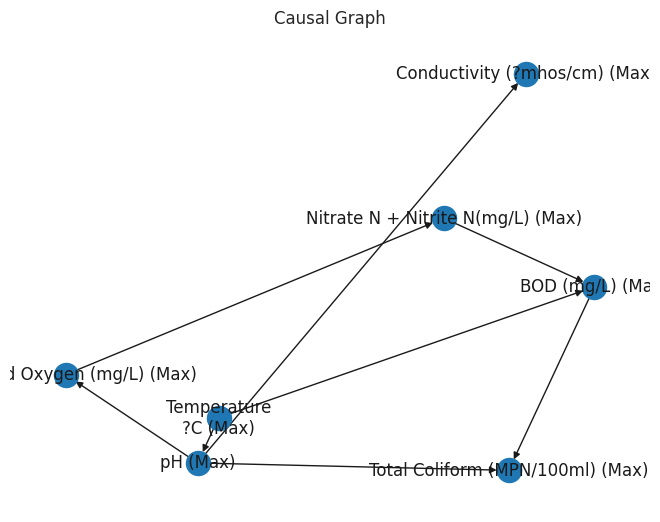

In [51]:
import matplotlib.pyplot as plt
import networkx as nx

# Ensure that the adjacency matrix is a numpy array if it's not already
adjacency_matrix = np.asarray(model.adjacency_matrix_)

# Create a graph from the adjacency matrix
causal_graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)

# Relabel nodes to match original variable names
mapping = {i: col for i, col in enumerate(selected_columns)}
causal_graph = nx.relabel_nodes(causal_graph, mapping)

# Draw the graph
pos = nx.spring_layout(causal_graph)
nx.draw(causal_graph, pos, with_labels=True, arrows=True)
plt.title('Causal Graph')
plt.show()


In [52]:
pip install pygam

In [53]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 934.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=ffb8212d0e73cc21f9d1bdee6833fa0eda4c436383d31a423e30190c9c5c38f1
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [55]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [56]:
from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

# **Lets preprocess the data**

In [57]:
df1 = df.drop(["STN\nCode","Name of Monitoring Location"], axis=1)
df1 = df1.dropna(how='any')


In [58]:
display(pd.DataFrame(df1.isnull().sum()).T)

,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
oe = ce.ordinal.OrdinalEncoder(
    cols=df1.select_dtypes(include="object")
    )

df_en = oe.fit_transform(df1)

In [60]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

18
{'Type Water Body': 0, 'State Name': 1, 'Temperature\n?C (Min)': 2, 'Temperature\n?C (Max)': 3, 'Dissolved Oxygen (mg/L) (Min)': 4, 'Dissolved Oxygen (mg/L) (Max)': 5, 'pH (Min)': 6, 'pH (Max)': 7, 'Conductivity (?mhos/cm) (Min)': 8, 'Conductivity (?mhos/cm) (Max)': 9, 'BOD (mg/L) (Min)': 10, 'BOD (mg/L) (Max)': 11, 'Nitrate N + Nitrite N(mg/L) (Min)': 12, 'Nitrate N + Nitrite N(mg/L) (Max)': 13, 'Fecal Coliform (MPN/100ml) (Min)': 14, 'Fecal Coliform (MPN/100ml) (Max)': 15, 'Total Coliform (MPN/100ml) (Min)': 16, 'Total Coliform (MPN/100ml) (Max)': 17}


# **Lets set Prior KNowledge**



1.   Exogenous_variables :"Type Water Body", "State Name"
2.   Causal relationship : "pH (Max)" and "pH (Min)", 'Temperature\n?C (Min)' and 'Temperature\n?C (Max)', 'Dissolved Oxygen (mg/L) (Min)' and 'Dissolved Oxygen (mg/L) (Max)'






In [61]:
prior_knowledge = make_prior_knowledge(
    18,
    exogenous_variables = [df_dict["Type Water Body"], df_dict["State Name"]],
    paths = [
             [df_dict["pH (Max)"], df_dict["pH (Min)"],[df_dict['Temperature\n?C (Min)'],df_dict['Temperature\n?C (Max)'],df_dict['Dissolved Oxygen (mg/L) (Min)'],df_dict['Dissolved Oxygen (mg/L) (Max)']]],
             ],

)

# **LiNGAM Modeling**

In [62]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en)

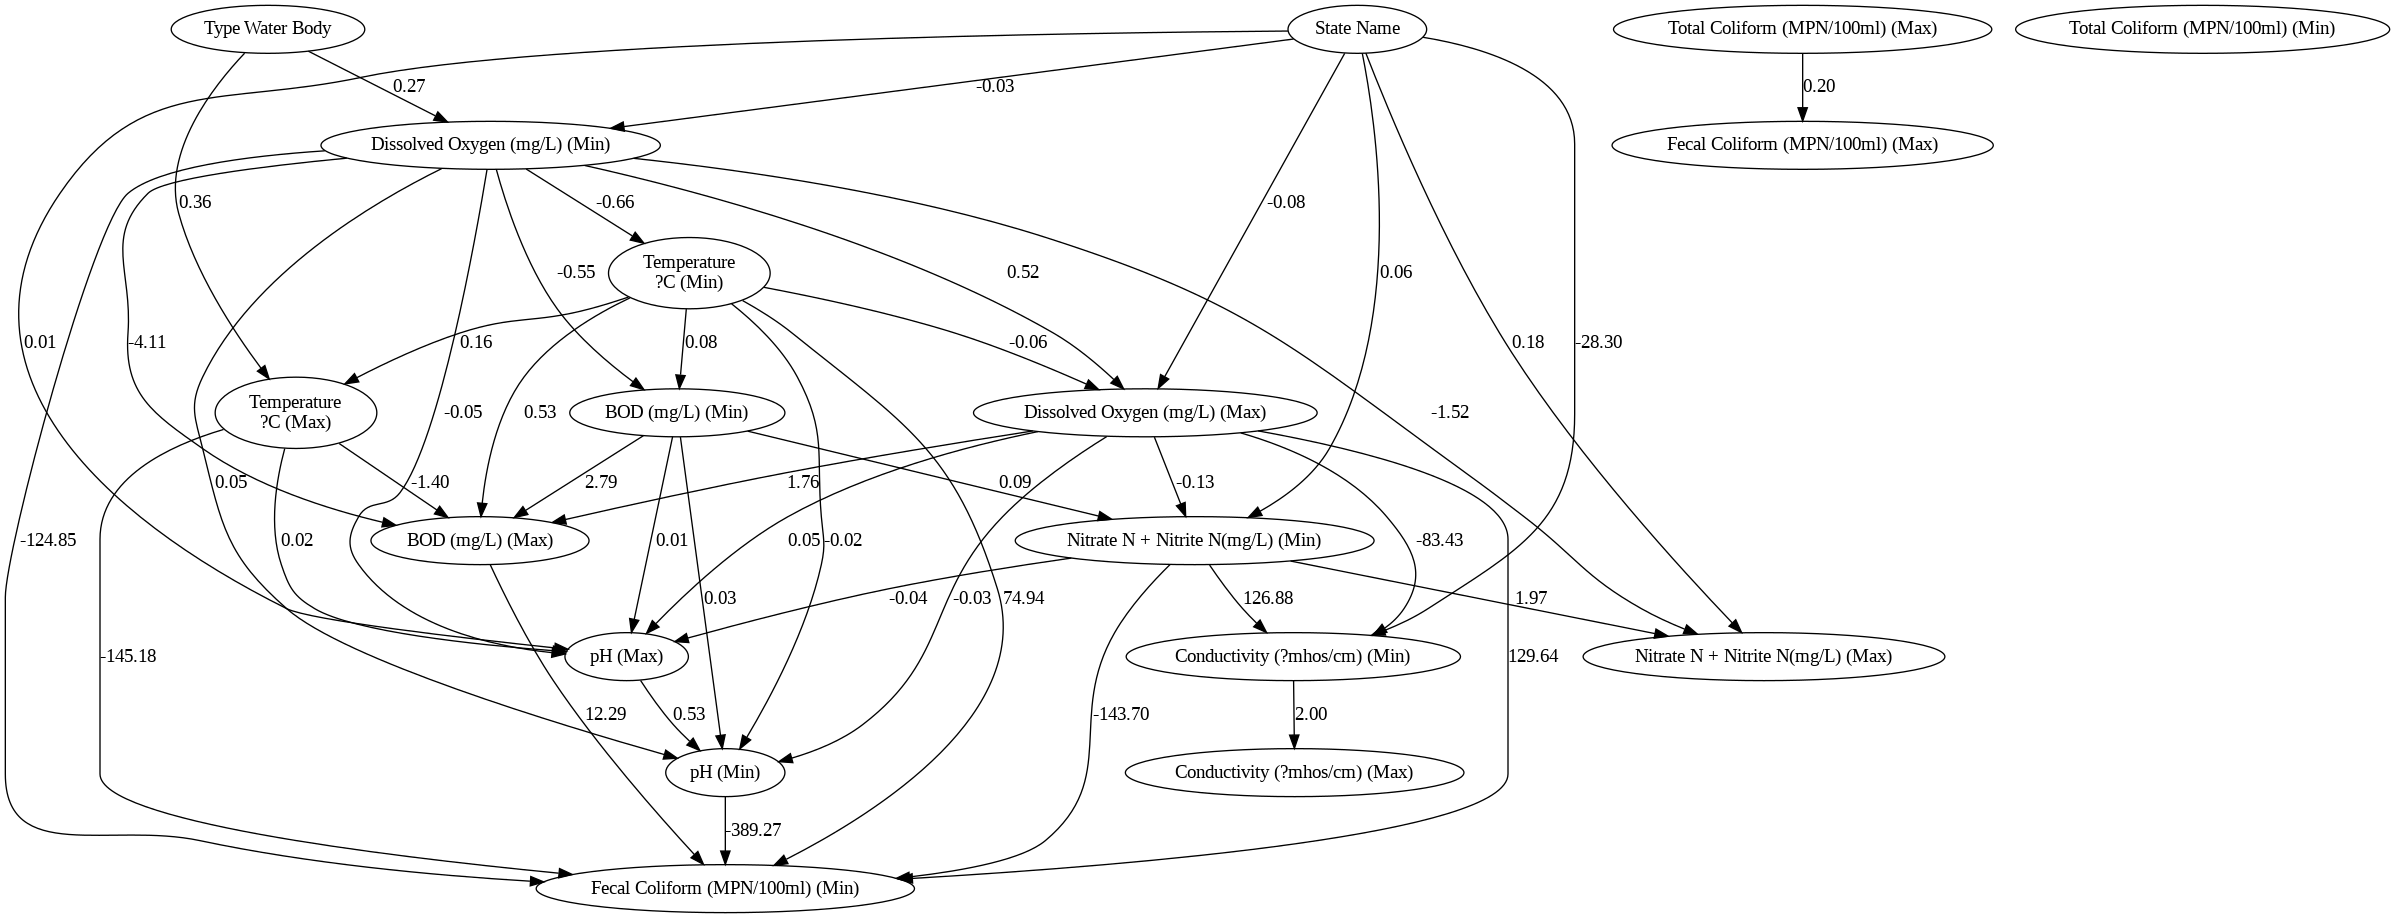

In [63]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df_en.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

# **LiNGAM with Linear Regression (Target Variable : "pH (Max)")**

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df_en.drop(["pH (Max)"], axis=1), df_en["pH (Max)"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


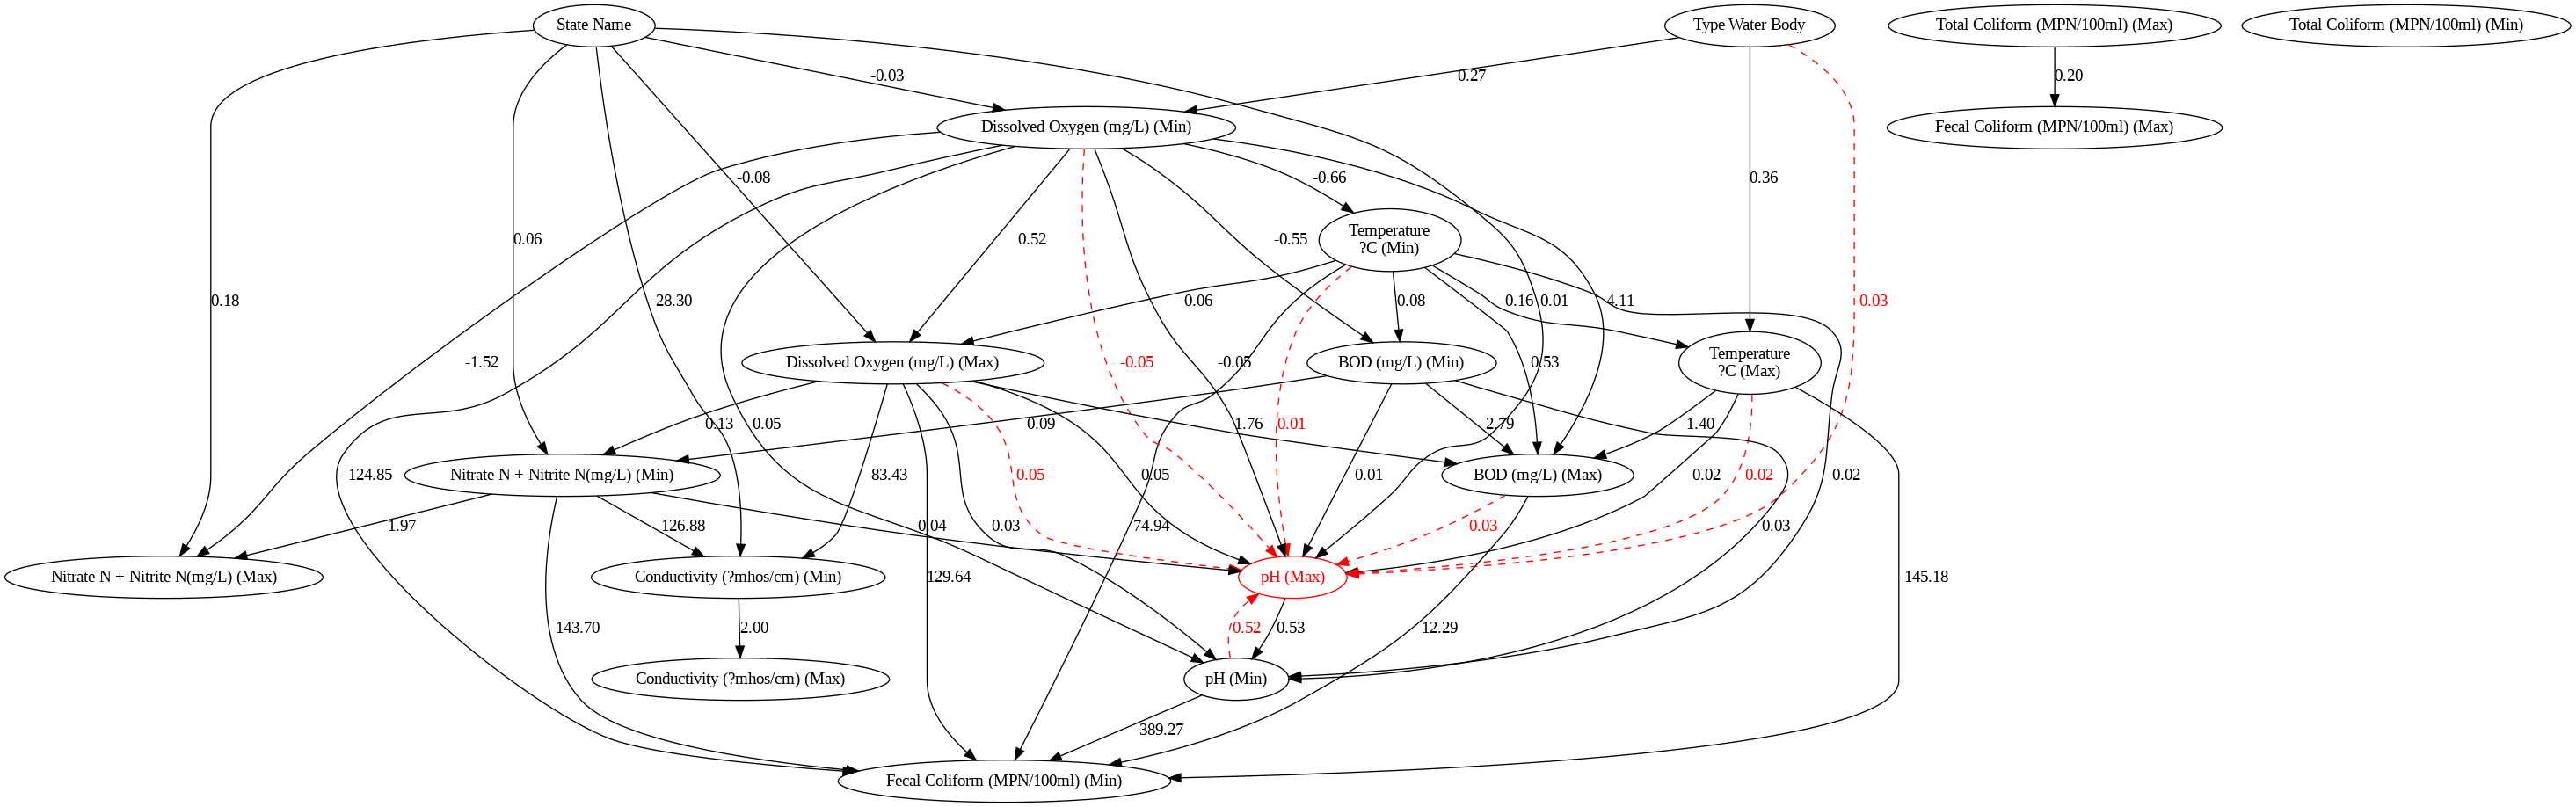

In [65]:
features = [i for i in range(df_en.drop(["pH (Max)"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='pH (Max)',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

In [ ]:
LiNGAM with Linear Regression (Target Variable : "BOD (mg/L) (Max)")

In [66]:
reg.fit(df_en.drop(["BOD (mg/L) (Max)"], axis=1), df_en["BOD (mg/L) (Max)"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


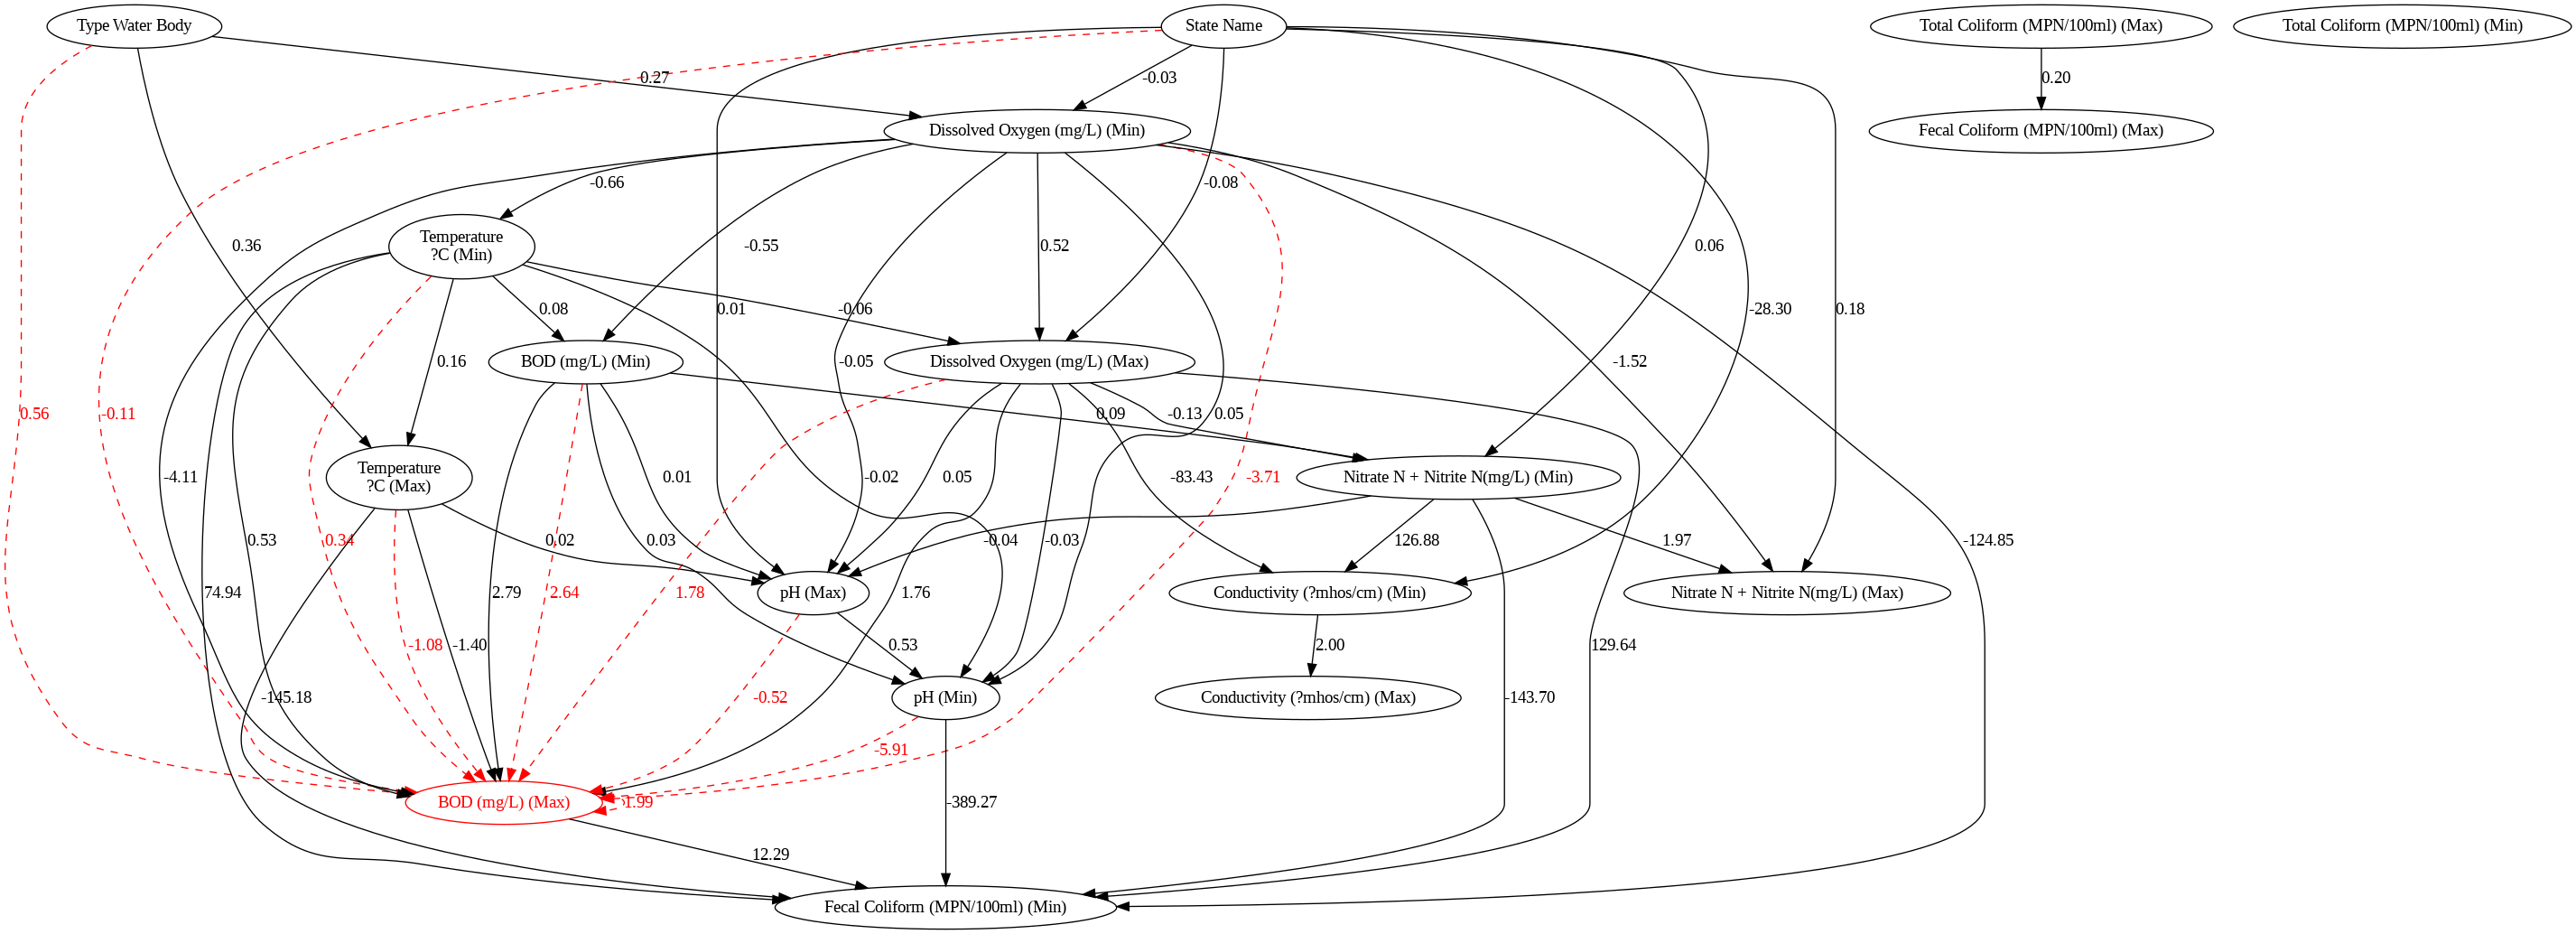

In [67]:
features = [i for i in range(df_en.drop(["BOD (mg/L) (Max)"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='BOD (mg/L) (Max)',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

In [69]:
# Assuming df is your raw DataFrame loaded from 'Water_pond_tanks_2021.csv'

# Drop columns that won't be used in the LiNGAM analysis
df_clean = df.drop(["STN\nCode", "Name of Monitoring Location"], axis=1)

# Fill missing values with the median of each column
df_clean.fillna(df.median(), inplace=True)

# Ordinal Encoding for categorical data
oe = ce.OrdinalEncoder(cols=df_clean.select_dtypes(include="object").columns)
df_encoded = oe.fit_transform(df_clean)


<ipython-input-69-2b18ed29821f>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.fillna(df.median(), inplace=True)


In [70]:
# Define the prior knowledge
# Here we're specifying that 'Type Water Body' and 'State Name' are exogenous variables
prior_knowledge = make_prior_knowledge(
    n_variables=len(df_encoded.columns),
    exogenous_variables=[df_encoded.columns.get_loc("Type Water Body"),
                         df_encoded.columns.get_loc("State Name")]
)

# Initialize and fit the LiNGAM model
model = DirectLiNGAM(prior_knowledge=prior_knowledge)
model.fit(df_encoded.values)

# Causal order implies the order in which the variables affect each other
print("Causal Order:", model.causal_order_)

# The adjacency matrix indicates the strength of the relationship between variables
print("Adjacency Matrix:\n", model.adjacency_matrix_)


Causal Order: [0, 1, 17, 15, 16, 4, 2, 5, 3, 10, 11, 12, 13, 8, 9, 7, 6, 14]
Adjacency Matrix:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -6.54071091e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.53

**Lets interpret these graphs**

**Dirrection of Influence:** An arrow pointing from one variable to another suggests the former is having a direct causal influence on the latter. For instance, if there's an arrow from "Temperature °C (Min)" to "Dissolved Oxygen (mg/L) (Min)," it would imply that minimum temperature has a direct influence on the minimum levels of dissolved oxygen.


**Strength of Influence:** The numbers on the edges, often represented as coefficients, quantify how strong the influence is. A larger absolute value means a stronger influence. Positive values suggest that as the cause increases, the effect also increases, while negative values suggest an inverse relationship.


**Causal Pathways:** The presence of multiple interconnected paths could indicate complex causal relationships. For example, "Temperature °C (Max)" may influence "Dissolved Oxygen (mg/L) (Max)" directly, and also indirectly by affecting another variable like "BOD (mg/L) (Max)" which then affects "Dissolved Oxygen."


**Feedback Loops:** If you see a cycle of arrows connecting a group of variables, it suggests the presence of a feedback loop. However, true causal models should ideally be acyclic (hence the term Directed Acyclic Graph, or DAG).


**Exogenous Variables:** Variables like "Type Water Body" or "State Name," which have arrows coming out of them but none going into them, are considered exogenous. They are treated as external factors that influence other variables within the system but are themselves unaffected by the system.


**Potential Confounding:** If two variables like "pH (Max)" and "pH (Min)" are highly interconnected with many others, they may be confounding factors that influence or are influenced by multiple variables, making the causal relationships more complex to disentangle.

# **Conclusion**

**Conclusion of Causal Inference Analysis:**

Throughout this causal analysis, we've explored a range of variables and their interrelationships within a particular domain, likely environmental science, given the focus on water quality parameters. The causal graphs provided insights into how various factors such as temperature, pH, and biochemical oxygen demand (BOD) might influence one another within water bodies.

The application of the LiNGAM (Linear Non-Gaussian Acyclic Model) algorithm helped us hypothesize the direction and strength of these relationships, highlighting potential causes and effects that warrant further investigation. We identified several key variables that could serve as levers for intervention and potential targets for policy measures or environmental management strategies.

One significant takeaway from this analysis is the complex nature of environmental systems, where multiple factors are interlinked in intricate ways that require careful statistical and domain-specific consideration to understand fully. We observed that certain variables act as influencers on multiple other measures, indicating points where interventions could have widespread effects.

The analysis emphasized the importance of robust causal inference techniques in uncovering these relationships, which can lead to more informed decision-making. By integrating domain knowledge, rigorous data analysis, and advanced causal inference methodologies, we can move closer to understanding the underlying dynamics of complex systems and how to influence them effectively.

**References**



1.   https://towardsdatascience.com/causality-an-introduction-f8a3f6ac4c4a#:~:text=In%20causal%20inference%2C%20the%20causal,causal%20structures%20from%20observational%20data.

1.   https://www.youtube.com/watch?v=gRkUhg9Wb-I&ab_channel=MITOpenCourseWare
2.   https://link.springer.com/article/10.2333/bhmk.41.65


2.   https://sites.google.com/view/sshimizu06/lingam/lingampapers/basic-linear-models



MIT License

Copyright (c) 2024 Vivek Basavanth Hanagoji

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.